# Simple Linear Regression

This notebook provides an introduction to Simple Linear Regression using a single feature to predict a target value. The example focuses on predicting weight from height using a linear model.

## Dataset Example

Let's create a simple dataset with Height (cm) and Weight (kg):

In [1]:

import pandas as pd
# Data: Heights (cm) and Weights (kg)
data = {
    'Height': [170, 180, 175.4,190,200],
    'Weight': [74, 80, 75, 85, 98]
}
df = pd.DataFrame(data)
df


,Height,Weight
0,170.0,74
1,180.0,80
2,175.4,75
3,190.0,85
4,200.0,98


## Visualize Data

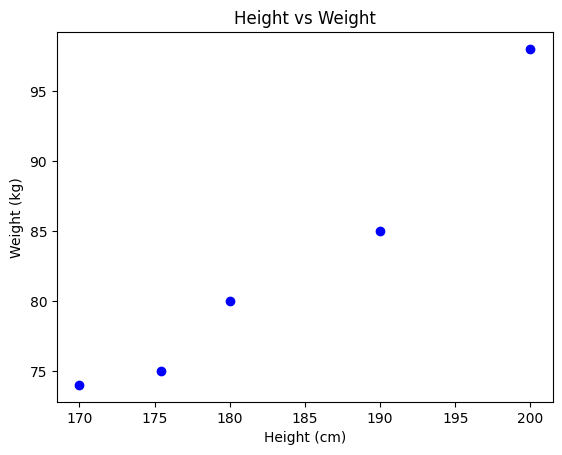

In [2]:

import matplotlib.pyplot as plt
plt.scatter(df['Height'], df['Weight'], color='blue')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs Weight')
plt.show()


## Linear Regression Model

The simple linear regression model has the following formula:

y = mX + c 

Where:
- y = predicted value (Weight)
- X = feature (Height)
- m = slope (coefficient)
- c = intercept

## Cost Function (MSE)

A cost function is a mathematical function that measures how well or poorly a model performs by comparing its predictions to the actual data.

It tells the algorithm “how far off” the model’s predictions are from the real values.

The goal of training a machine learning model is to minimize the cost function — i.e., make the model’s predictions as accurate as possible.

General Idea

- Cost Function (J)=Difference between predicted and actual values

The smaller the cost value, the better the model.

The Mean Squared Error (MSE) is used as the cost function:

J(m, c) = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2 

where:

- 𝑚 → number of training examples

- ℎ𝜃(𝑥^(𝑖)) → predicted value (model output)

- 𝑦^(𝑖) → actual (true) value

- 𝐽(𝜃) → cost (error measure)

### Python Example (Linear Regression Cost Function)

Cost Function (MSE): 0.72


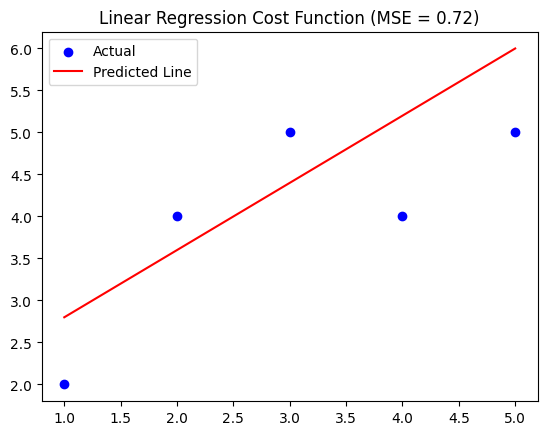

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Actual data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Predicted line: y_pred = m*x + c
m, c = 0.8, 2
y_pred = m * x + c

# Mean Squared Error (MSE)
mse = np.mean((y - y_pred)**2)
print("Cost Function (MSE):", mse)

# Visualize
plt.scatter(x, y, color='blue', label='Actual')
plt.plot(x, y_pred, color='red', label='Predicted Line')
plt.title(f"Linear Regression Cost Function (MSE = {mse:.2f})")
plt.legend()
plt.show()


## Intuition of Cost Function

Think of the cost function as a mountain landscape — your model starts somewhere on the mountain, and gradient descent helps it move downhill to find the lowest valley (minimum cost).

## Gradient Descent

**Gradient Descent is an optimization algorithm** used to minimize the **cost (or loss) function** in machine learning and deep learning.

It helps the model **find the best parameters (like weights and bias)** that give the lowest error between predicted and actual values.

---

### Intuitive Explanation

Imagine you’re standing on top of a hill 🌄 and want to reach the lowest point in the valley.
But — it’s foggy ☁️, and you can’t see far.
So, what do you do?

👉 You look at the slope of the ground (the gradient) and take a small step downhill.
Keep repeating this process, and eventually, you’ll reach the lowest point — the minimum of the function.

That’s Gradient Descent — taking small steps in the direction that reduces the cost the most.

We use gradient descent to optimize the values of **m**  and **c** to minimize the cost function.

\nUpdate rules:
- m := m - alpha (partial J / partial m)
- c := c - alpha (partial J / partial c) 

Where **alpha**  is the **learning rate**.

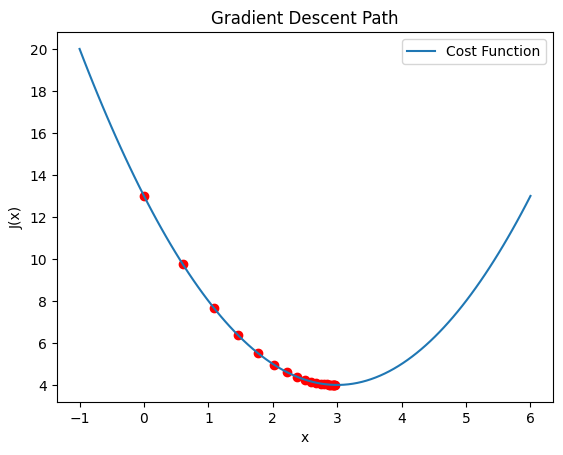

Minimum found at x ≈ 2.9654123548617948


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Cost function J = (x-3)^2 + 4 (minimum at x=3)
def J(x):
    return (x - 3)**2 + 4

# Derivative (gradient)
def dJ(x):
    return 2 * (x - 3)

# Gradient Descent
x = 0        # initial guess
alpha = 0.1  # learning rate
steps = [x]
for _ in range(20):
    x = x - alpha * dJ(x)
    steps.append(x)

# Plot
x_vals = np.linspace(-1, 6, 100)
plt.plot(x_vals, J(x_vals), label='Cost Function')
plt.scatter(steps, [J(s) for s in steps], color='red')
plt.title('Gradient Descent Path')
plt.xlabel('x')
plt.ylabel('J(x)')
plt.legend()
plt.show()

print("Minimum found at x ≈", steps[-1])


## Implementation from Scratch

In [5]:

import numpy as np
X = df['Height'].values
y = df['Weight'].values
# Initialize parameters
m = 0
c = 0
alpha = 0.0001
epochs = 1000
n = float(len(X))
for i in range(epochs):
    y_pred = m*X + c
    dm = (-2/n) * sum(X * (y - y_pred))
    dc = (-2/n) * sum(y - y_pred)
    m = m - alpha * dm
    c = c - alpha * dc
print(f"After {epochs} iterations: Slope (m) = {m:.4f}, Intercept (c) = {c:.4f}")


After 1000 iterations: Slope (m) = nan, Intercept (c) = nan


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24524\3666772077.py:12: RuntimeWarning: overflow encountered in scalar add
  dm = (-2/n) * sum(X * (y - y_pred))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24524\3666772077.py:14: RuntimeWarning: invalid value encountered in scalar subtract
  m = m - alpha * dm


## Plot Regression Line

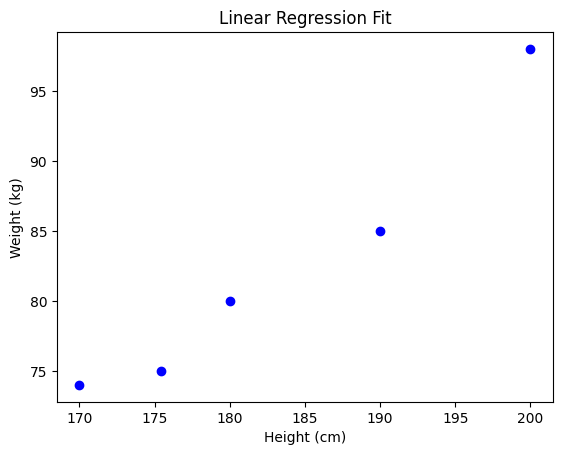

In [ ]:
plt.scatter(X, y, color='blue')
plt.plot(X, m*X + c, color='red')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Linear Regression Fit')
plt.show()


## Conclusion
Gradient Descent is an iterative optimization algorithm used here to find the best-fit line for the linear regression model.